<a href="https://colab.research.google.com/github/dariodesalvo/ProyectoCalculadora/blob/master/Aprendiendo_con_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introducción

Por iniciativa de la Organización Mundial de la Salud el 19 de octubre se celebra mundialmente el día internacional de la lucha contra el cáncer de mama con el objetivo de crear conciencia y promover que cada vez más mujeres accedan a controles, diagnósticos y tratamientos oportunos y efectivos.

<img src="https://i.ibb.co/PQjhtPK/Logo-Datos-Vivos.png" width="200px">

Desde https://escueladedatosvivos.ai/ nos propusieron poner en práctica lo que venimos aprendiendo y a la vez poder darle visibilidad a este tema tan importante.


Para este trabajo se utiliza el dataset de diagnóstico publicado en 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
con el objetivo de lograr una clasificación de tumores en benignos o malignos utilizando algunas técnicas de ML.




 <img src=“https://i.ibb.co/PQjhtPK/Logo-Datos-Vivos.png” width=“200px”>



#1. Importación de librerias y dataset

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
!pip install funpymodeling
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars, corr_pair
from google.colab import drive, data_table
drive.mount('/content/drive')
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install minepy
from __future__ import division
from minepy import MINE
import itertools

os.chdir('/content/drive/My Drive/Colab Notebooks/')

#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
data=pd.read_csv("breastCancer/breast-cancer-wisconsin.data", sep = ",")

#Attribute Information:

#1. Sample code number: id number
#2. Clump Thickness: 1 - 10
#3. Uniformity of Cell Size: 1 - 10
#4. Uniformity of Cell Shape: 1 - 10
#5. Marginal Adhesion: 1 - 10
#6. Single Epithelial Cell Size: 1 - 10
#7. Bare Nuclei: 1 - 10
#8. Bland Chromatin: 1 - 10
#9. Normal Nucleoli: 1 - 10
#10. Mitoses: 1 - 10
#11. Class: (2 for benign, 4 for malignant)

data.columns =['id', 'Clump_thickness', 'U_C_Size', 'U_C_Shape','Marginal_adhesion', 'SEpithelial_CS','Bare_N', 'Bland_C', 'Normal_N', 'Mitoses', 'Class']


     |████████████████████████████████| 225kB 5.9MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive
     |████████████████████████████████| 501kB 5.6MB/s 
  Created wheel for minepy: filename=minepy-1.2.5-cp36-cp36m-linux_x86_64.whl size=176793 sha256=01d08dc5f484bb5142e6a3eb155938a1c06edb48bbe40493e79c19df8e427ac7
  Stored in directory: /root/.cache/pip/wheels/4c/71/51/9be91db14029255f68489582bc85e7dfc7b11fa8961be0081d
Successfully built minepy


#2. Análisis exploratorio y preparación de datos

In [ ]:
data.head()

,id,Clump_thickness,U_C_Size,U_C_Shape,Marginal_adhesion,SEpithelial_CS,Bare_N,Bland_C,Normal_N,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 698 non-null    int64 
 1   Clump_thickness    698 non-null    int64 
 2   U_C_Size           698 non-null    int64 
 3   U_C_Shape          698 non-null    int64 
 4   Marginal_adhesion  698 non-null    int64 
 5   SEpithelial_CS     698 non-null    int64 
 6   Bare_N             698 non-null    object
 7   Bland_C            698 non-null    int64 
 8   Normal_N           698 non-null    int64 
 9   Mitoses            698 non-null    int64 
 10  Class              698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Utilizando la función **data de funpymodeling** obtenemos un reporte de la composición de nuestro dataset.

In [ ]:
status(data)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.0,0,0.0,644,int64
1,Clump_thickness,0,0.0,0,0.0,10,int64
2,U_C_Size,0,0.0,0,0.0,10,int64
3,U_C_Shape,0,0.0,0,0.0,10,int64
4,Marginal_adhesion,0,0.0,0,0.0,10,int64
5,SEpithelial_CS,0,0.0,0,0.0,10,int64
6,Bare_N,0,0.0,0,0.0,11,object
7,Bland_C,0,0.0,0,0.0,10,int64
8,Normal_N,0,0.0,0,0.0,10,int64
9,Mitoses,0,0.0,0,0.0,9,int64


**Consideraciones de lo obtenido hasta el momento:**


1. Comparando el attibute information del dataset con el reporte de status()
vemos que Bare_N no coincide su tipo.
2. El dataset posee 698 registros y 644 ids unicos -> ¿hay más de un estudio de alguna persona? ¿existen repetidos?
3. La variable a predecir Class utiliza 2 y 4 puede reemplazarse por 0 y 1. 



###2.1 Exploración de variable Bare_N

In [ ]:
data_solving_1 = data.sort_values('Bare_N')

In [ ]:
data_solving_1['Bare_N']

306    1
396    1
395    1
394    1
393    1
      ..
296    ?
293    ?
291    ?
234    ?
163    ?
Name: Bare_N, Length: 698, dtype: object

Detectamos que los valores nulos se expresan a través de un "?".

###2.2 Tratamiento de Nulos


Dado el tamaño del dataset y que son muy pocos valores nulos la estrategia a usar será reemplazar por la mediana. Se deja la variable en su tipo correspondiente pasándola de categórica a numérica.

In [ ]:

mediana=np.median(data['Bare_N']!= "?")
data['Bare_N'] = np.where(data['Bare_N']=="?",mediana,data['Bare_N'])
data['Bare_N']=data['Bare_N'].astype(np.int64)

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.0,0,0.0,644,int64
1,Clump_thickness,0,0.0,0,0.0,10,int64
2,U_C_Size,0,0.0,0,0.0,10,int64
3,U_C_Shape,0,0.0,0,0.0,10,int64
4,Marginal_adhesion,0,0.0,0,0.0,10,int64
5,SEpithelial_CS,0,0.0,0,0.0,10,int64
6,Bare_N,0,0.0,0,0.0,10,int64
7,Bland_C,0,0.0,0,0.0,10,int64
8,Normal_N,0,0.0,0,0.0,10,int64
9,Mitoses,0,0.0,0,0.0,9,int64


####2.2.b Otro enfoque posible que no es usado

In [ ]:
#2 tratamiento de nulos dejando la variable como numérica al final añadiendo una columna flag
#2.1 
#data_to_clean=data

#for index, row in data_to_clean.iterrows():
#    if data_to_clean.loc[index,'Bare_N']=="nulo":
#        data_to_clean.loc[index,'Bare_N']="9999"
#        data_to_clean.loc[index,'bare_n_is_null']=1
#    else:
#        data_to_clean.loc[index,'bare_n_is_null']=0

#2.2 pasaje a númerico
#data_to_clean['Bare_N_numeric']=data_to_clean['Bare_N'].astype(int)

#borramos la original
#data_to_clean.drop('Bare_N', axis=1, inplace=True)

#data_to_clean

###2.3 Analizando las distribuciones de las variables

In [ ]:
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,id,1.071807e+06,617532.274029,0.576160,145430.23,411453.0,870258.25,1171710.0,1238354.0,1333897.7,1368267.18
1,Clump_thickness,4.416905e+00,2.817673,0.637929,1.00,1.0,2.00,4.0,6.0,10.0,10.00
2,U_C_Size,3.137536e+00,3.052575,0.972921,1.00,1.0,1.00,1.0,5.0,10.0,10.00
3,U_C_Shape,3.210602e+00,2.972867,0.925953,1.00,1.0,1.00,1.0,5.0,10.0,10.00
4,Marginal_adhesion,2.809456e+00,2.856606,1.016783,1.00,1.0,1.00,1.0,4.0,10.0,10.00
5,SEpithelial_CS,3.217765e+00,2.215408,0.688493,1.00,1.0,2.00,2.0,4.0,8.0,10.00
6,Bare_N,3.489971e+00,3.623301,1.038204,1.00,1.0,1.00,1.0,5.0,10.0,10.00
7,Bland_C,3.438395e+00,2.440056,0.709650,1.00,1.0,2.00,3.0,5.0,8.0,10.00
8,Normal_N,2.869628e+00,3.055004,1.064600,1.00,1.0,1.00,1.0,4.0,10.0,10.00
9,Mitoses,1.590258e+00,1.716162,1.079172,1.00,1.0,1.00,1.0,1.0,5.0,10.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1c44d198>,
      dtype=object)

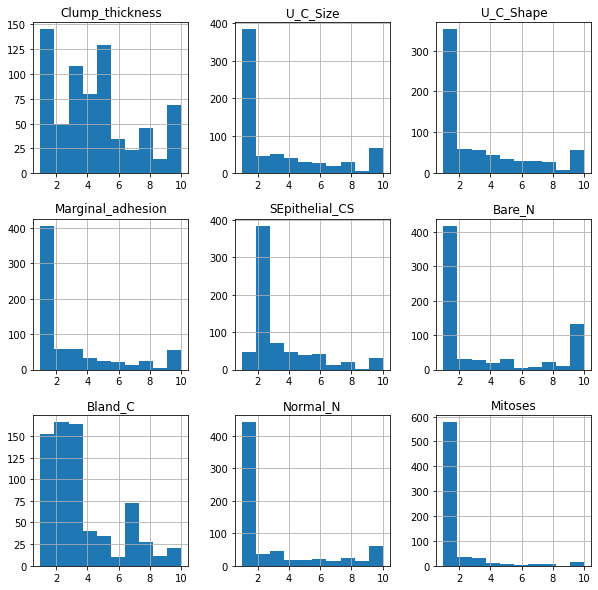

In [ ]:
#Enfoque 360 filosofía de escueladedatos.ai
data.drop(['id','Class'],1).hist(figsize = (10,10))

Profundizamos el análisis utilizando Pandas Profiling

In [ ]:
#https://medium.com/python-in-plain-english/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#restart kernel

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

In [ ]:
profile=ProfileReport(data)
profile.to_notebook_iframe()

Profiling confirma la hipótesis 2 de registros duplicados.
"Dataset has 8 (1.1%) duplicate rows"
Se decide en este caso eliminarlos, aunque hay que analizar según el dataset.

In [ ]:
data.drop_duplicates()

,id,Clump_thickness,U_C_Size,U_C_Shape,Marginal_adhesion,SEpithelial_CS,Bare_N,Bland_C,Normal_N,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


Como id no aporta más nada se elimina

In [ ]:

data.drop('id', axis=1, inplace=True)

###2.4 Análisis de correlación utilizando funpymodeling

In [ ]:
 # method: `pearson` as default, same as `corr` function in pandas. 
 corr_data=corr_pair(data)
 data_table.DataTable(corr_data)

,v1,v2,R,R2
1,U_C_Size,Clump_thickness,0.645366,0.416498
2,U_C_Shape,Clump_thickness,0.655089,0.429141
3,Marginal_adhesion,Clump_thickness,0.486699,0.236876
4,SEpithelial_CS,Clump_thickness,0.522108,0.272597
5,Bare_N,Clump_thickness,0.590430,0.348607
...,...,...,...,...
94,SEpithelial_CS,Class,0.682618,0.465968
95,Bare_N,Class,0.818839,0.670498
96,Bland_C,Class,0.756732,0.572644
97,Normal_N,Class,0.712067,0.507040


###2.4.2 Correlación MINE

In [ ]:
data_num=data
data_num = data_num.drop('Bare_N', 1)
col_pairs=list(itertools.combinations(data_num.columns, 2))
df_res = pd.DataFrame()
for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data_num[a], data_num[b])
    df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
df_res.sort_values("mic", ascending=False)




,mic,v1,v2
14,0.684396,U_C_Size,Class
8,0.682274,U_C_Size,U_C_Shape
20,0.661057,U_C_Shape,Class
10,0.550449,U_C_Size,SEpithelial_CS
32,0.548185,Bland_C,Class
29,0.514080,SEpithelial_CS,Class
11,0.504521,U_C_Size,Bland_C
16,0.497079,U_C_Shape,SEpithelial_CS
12,0.477962,U_C_Size,Normal_N
34,0.475481,Normal_N,Class


Podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas:

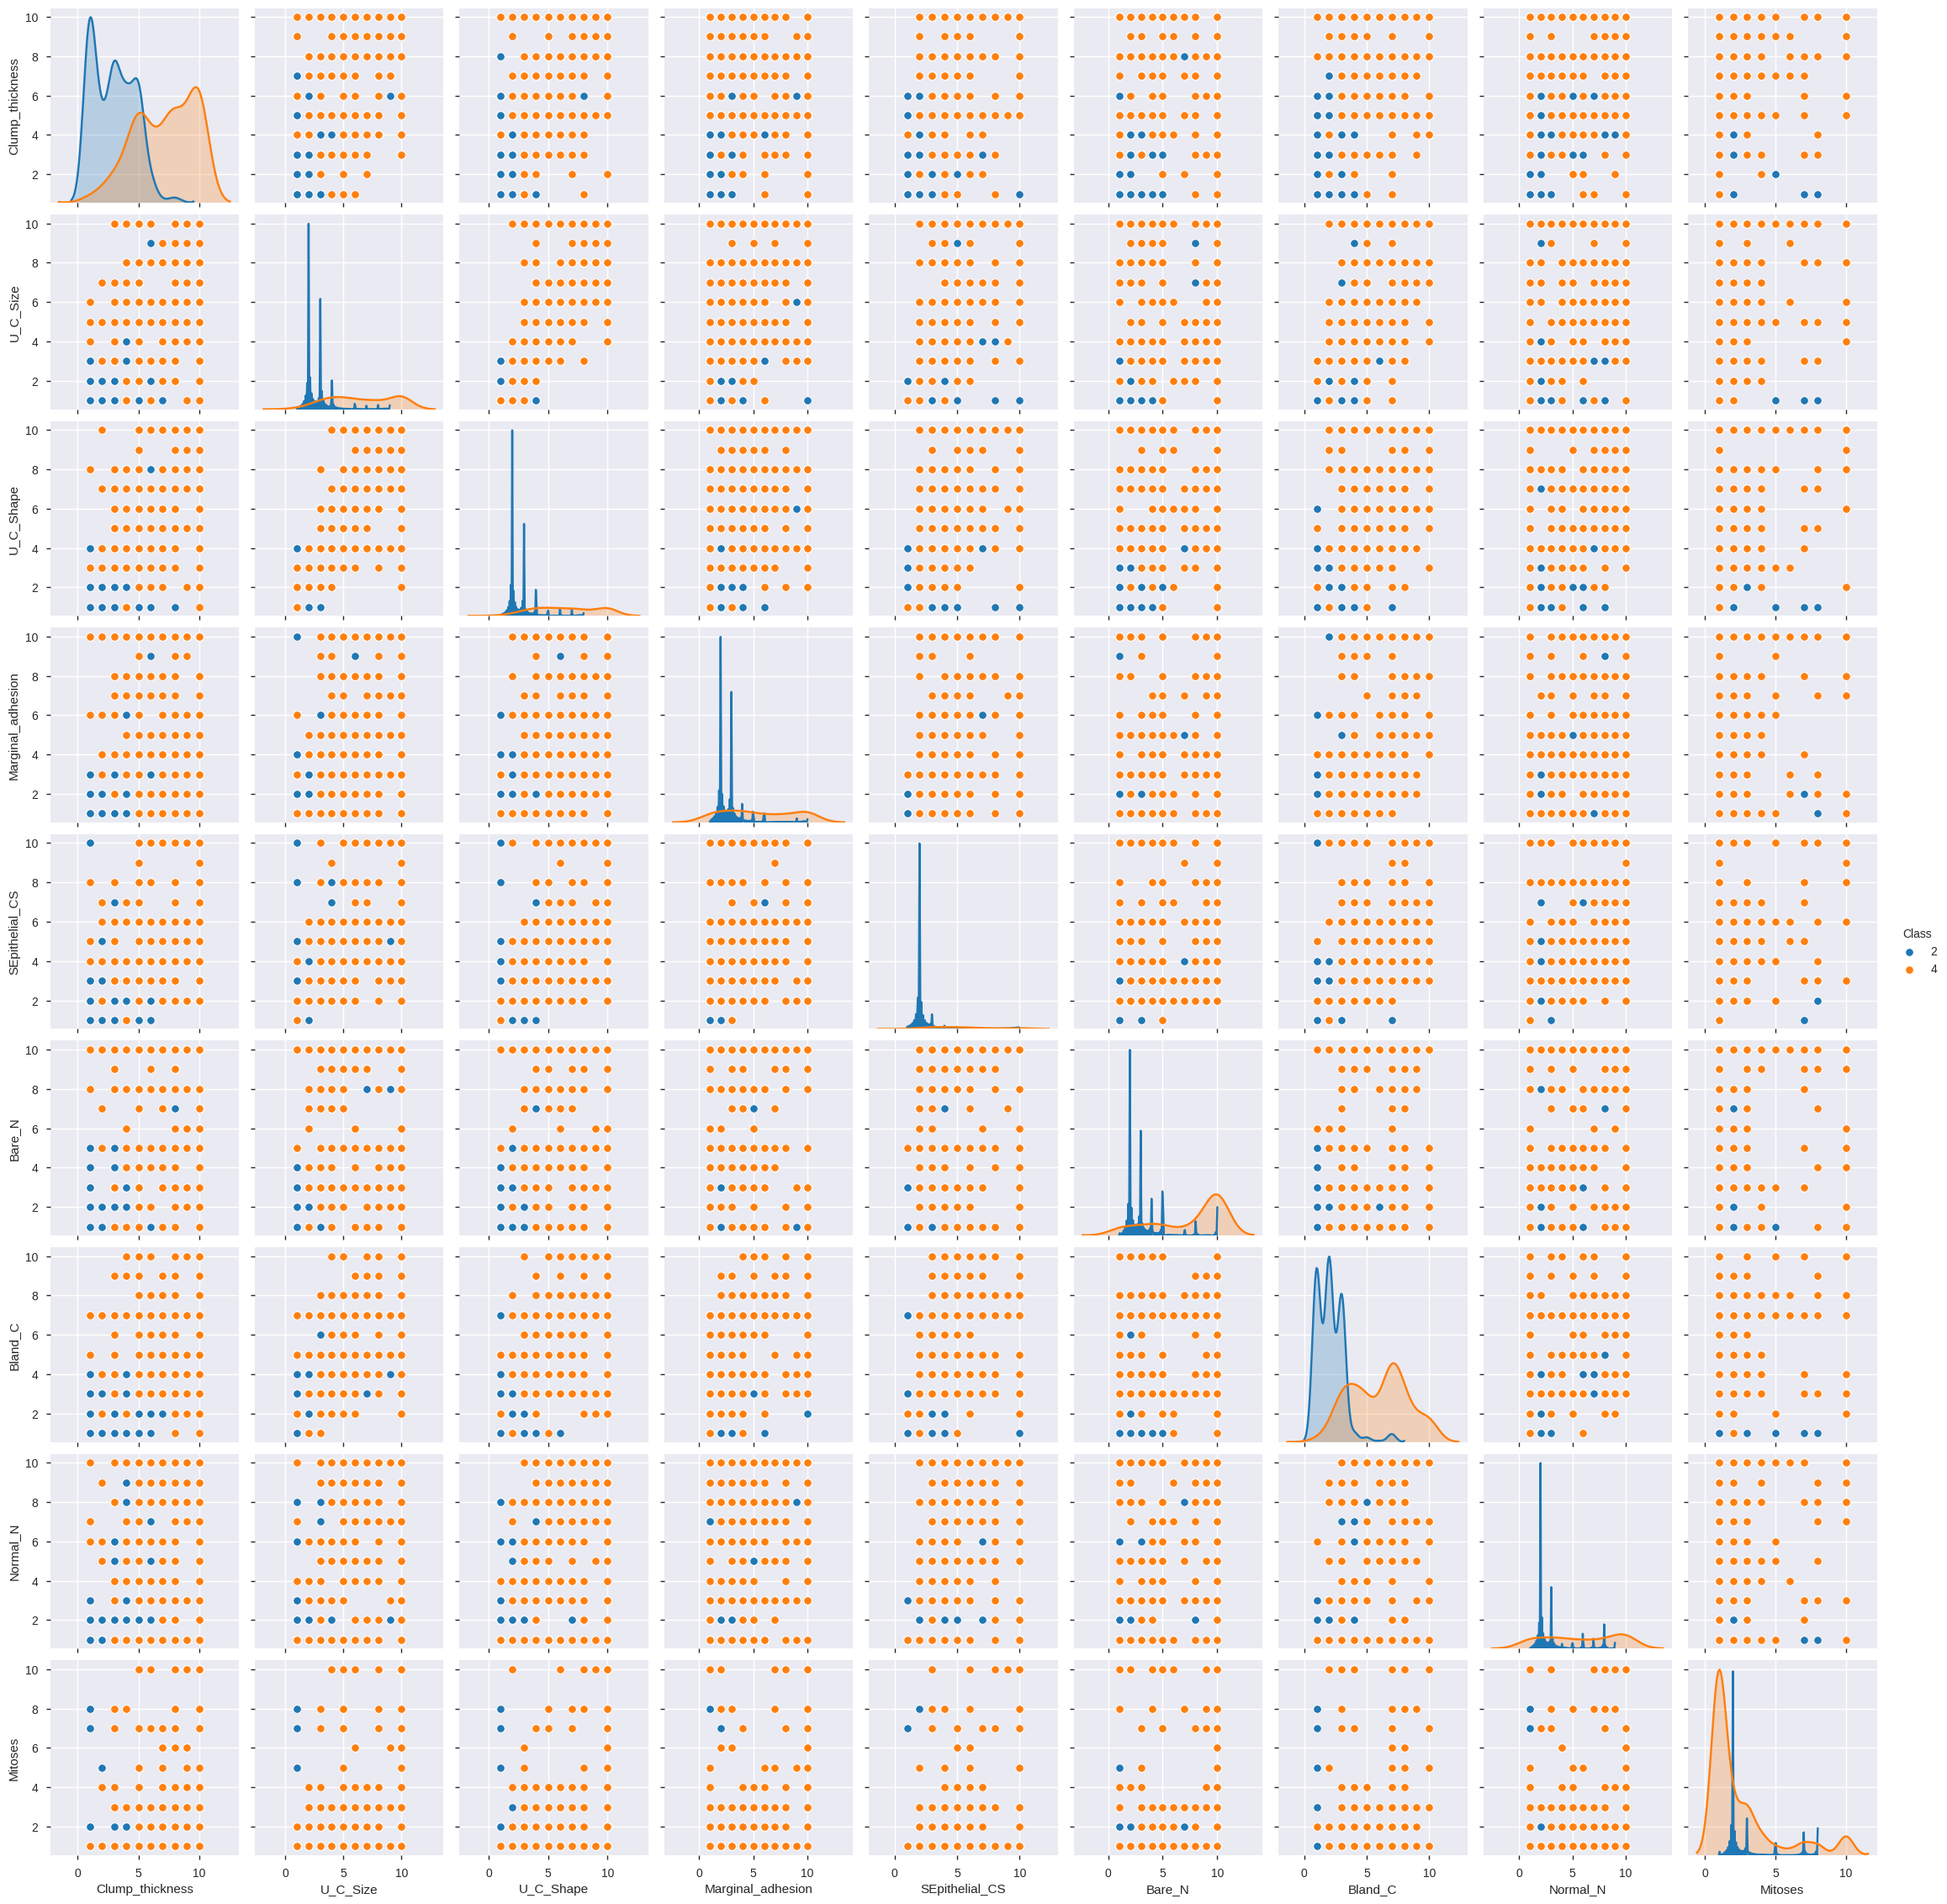

In [ ]:
sns.pairplot(data, hue="Class")

In [ ]:
#TODO1
#Discrepancia entre correlación lineal y MIC

###2.5 Ya que usaremos un modelo de clasificación binaria reemplazamos la variable a predecir por 0 (benigno) y 1 (maligno)

In [ ]:
data['Class']=np.where(data['Class']==2,0,1)

###2.6 Separación de entrenamiento/validación

In [ ]:
data_x=data.drop(['Class'], axis=1)
data_y=data['Class']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# 3. Creación del modelo predictivo

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Vemos algunas predicciones

In [ ]:
log_reg.predict_proba(x_test)[0:10]

array([[1.43773883e-04, 9.99856226e-01],
       [7.89339558e-03, 9.92106604e-01],
       [9.85647764e-01, 1.43522365e-02],
       [9.96622734e-01, 3.37726589e-03],
       [9.96054325e-01, 3.94567465e-03],
       [9.98790926e-01, 1.20907406e-03],
       [9.97664865e-01, 2.33513460e-03],
       [2.63956420e-01, 7.36043580e-01],
       [9.67397786e-04, 9.99032602e-01],
       [1.01918352e-04, 9.99898082e-01]])

# 4. Validación del modelo

###Matriz de confusión

Observamos métricas en datos de entrenamiento.

In [ ]:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=3) 

In [ ]:
from sklearn.metrics import confusion_matrix



array([[358,   9],
       [ 10, 181]])

La matriz de confusión nos aporta mucha información entre ello la cantidad de falsos positivos y falsos negativos, métricas de error que nos ayudan a ajustar nuestro algoritmo de predicción entrenado.

Es interesante calcular también la **precisión** dada por la sig. formula:
P = TP / (TP+FP)
donde P: precisión, TP: true positives, FP: false positives.

Esta métrica también es llamada sensitivity o true positive rate: es decir el radio de las instancias positivas que fueron clasificadas correctamente.

In [ ]:

from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.9526315789473684

Veamos como se comporta con los datos de test.

In [ ]:
y_test_pred = cross_val_predict(log_reg, x_test, y_test, cv=3) 
confusion_matrix(y_test, y_test_pred)

array([[87,  3],
       [ 6, 44]])

In [ ]:

precision_score(y_test, y_test_pred)

0.9361702127659575


Debemos intentar que estás metricas sean lo más similares posibles para asegurarnos que el algoritmo es estable.

###A continuación se continua la validación comparando las curvas ROC

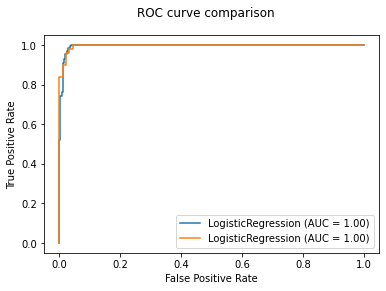

In [ ]:

from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

svc_disp = plot_roc_curve(log_reg, x_train, y_train)
rfc_disp = plot_roc_curve(log_reg, x_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

#5. Conclusiones